Librerias y corpus que se usara

In [1]:
import nltk
import string
import pandas as pd
import matplotlib .pyplot as plt
from nltk.corpus import gutenberg,stopwords,words,names,brown,movie_reviews,reuters
from nltk.probability import FreqDist

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\leona\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

**2.	Calcula las frecuencias a nivel de un carácter y genera histogramas para cada categoría. Para generar las gráficas, ordena las frecuencias de los caracteres de mayor a menor.**

In [2]:
Top_caracter=nltk.FreqDist(movie_reviews.raw()).most_common()[:20]
Tabla_caracteres = pd.DataFrame(Top_caracter)
Tabla_caracteres = Tabla_caracteres.rename(columns={1: 'Cantidad'})
Tabla_caracteres = Tabla_caracteres.rename(columns={0: 'Caracter'})
Tabla_caracteres

,Caracter,Cantidad
0,,1494584
1,e,722839
2,t,544518
3,a,480529
4,i,451141
5,o,437044
6,s,415452
7,n,407217
8,r,350682
9,h,320739


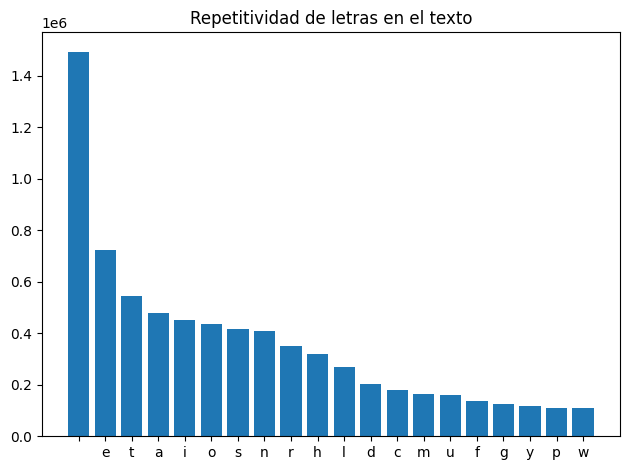

In [3]:
fig, axs = plt.subplots(sharey=True, tight_layout=True)
axs.bar(Tabla_caracteres['Caracter'],Tabla_caracteres['Cantidad'])
plt.title("Repetitividad de letras en el texto")
plt.show()

**Calcula las frecuencias a nivel de palabra y genera histogramas para cada categoría. Para generar las gráficas, ordena las frecuencias de los caracteres de mayor a menor. Remueve los símbolos de puntuación (comas, puntos, números, signos de interrogación, etc.) y acentos del texto. Solo se deberá procesar lo que se considera palabras.**

In [ ]:
Top_palabras=nltk.FreqDist(movie_reviews.words()).most_common()
Tabla_palabras = pd.DataFrame(Top_palabras)
Tabla_palabras = Tabla_palabras.astype(str).apply(lambda x: x.str.replace('[{}]'.format(string.punctuation), ""), regex=True)
Tabla_palabras = Tabla_palabras.rename(columns={1: 'Cantidad'})
Tabla_palabras = Tabla_palabras.rename(columns={0: 'palabra'})
Tabla_palabras=Tabla_palabras[Tabla_palabras.palabra !=""]
Tabla_palabras.reset_index(drop=True, inplace=True)
Tabla_palabras.head(n=20)

<ipython-input-101-98bb4f589984>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



,palabra,Cantidad
0,the,76529
1,a,38106
2,and,35576
3,of,34123
4,to,31937
5,is,25195
6,in,21822
7,s,18513
8,it,16107
9,that,15924



 **> a.	¿Cuántas palabras hay en cada categoría?**




In [ ]:
texto_positivo=nltk.FreqDist(movie_reviews.words(categories='pos')).most_common()
Tabla_texto_positivo = pd.DataFrame(texto_positivo)
Cantidad_texto_positivo_total=Tabla_texto_positivo[1].sum()
print(f"Tiene {Cantidad_texto_positivo_total} de positiva")

texto_negativos=nltk.FreqDist(movie_reviews.words(categories='neg')).most_common()
Tabla_texto_negativos = pd.DataFrame(texto_negativos)
Cantidad_texto_negativos_total=Tabla_texto_negativos[1].sum()
print(f"Tiene {Cantidad_texto_negativos_total} de negativa")

Tiene 832564 de positiva
Tiene 751256 de negativa


**> b.	¿Cuántas palabras diferentes (únicas) hay en cada categoría?**

In [ ]:
p_unicos=Tabla_texto_positivo.count()[1]
n_unicos=Tabla_texto_negativos.count()[1]
print(f"Tiene {p_unicos} de la categoria positiva unicos y {n_unicos} de la categoria negativos unicos")

Tiene 30417 de la categoria positiva unicos y 28480 de la categoria negativos unicos



**c.	¿Cuáles son las palabras con frecuencia 1 (hápax legomenón) en cada categoría? Muestra las primeras 100 palabras si es que las hay.**

In [ ]:
Tabla_positivos = Tabla_texto_positivo.loc[Tabla_texto_positivo[1] == 1]
Tabla_positivos.reset_index(drop=True, inplace=True)
Tabla_positivos.head(n=100)

,0,1
0,watchmen,1
1,researched,1
2,footnotes,1
3,riddle,1
4,sooty,1
...,...,...
95,elixir,1
96,nonentity,1
97,knob,1
98,gentile,1


In [ ]:
Tabla_negativo = Tabla_texto_negativos.loc[Tabla_texto_positivo[1] == 1]
Tabla_negativo.reset_index(drop=True, inplace=True)
Tabla_negativo.head(n=100)

,0,1
0,extensions,1
1,lengthen,1
2,slunk,1
3,discs,1
4,spanning,1
...,...,...
95,flank,1
96,steak,1
97,thermal,1
98,bobbing,1


**d.	¿Cuáles son las palabras más frecuentes en cada categoría? Mostrar las primeras 70 palabras si es que las hay, ¿en qué difieren en cada categoría?**

In [ ]:
TOP_100_p=nltk.FreqDist(movie_reviews.words(categories='pos')).most_common()[:70]
TOP_100_p = pd.DataFrame(TOP_100_p)
TOP_100_p

,0,1
0,",",42448
1,the,41471
2,.,33714
3,a,20196
4,and,19896
...,...,...
65,into,1363
66,just,1342
67,than,1308
68,its,1276


In [ ]:
TOP_100_n=nltk.FreqDist(movie_reviews.words(categories='neg')).most_common()[:70]
TOP_100_n = pd.DataFrame(TOP_100_p)
TOP_100_n

,0,1
0,",",42448
1,the,41471
2,.,33714
3,a,20196
4,and,19896
...,...,...
65,into,1363
66,just,1342
67,than,1308
68,its,1276
